### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

This notebook demonstrates how to do the following:
1. Create a list of chemical randomly drawn from HMDB.
2. Create a new mass spec object, takes chemicals as input.
3. Create a new controller and runs the mass spec.
4. Write mzml files.

Load densities trained on 19 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'
base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

In [8]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers.p'))

Load chromatogram data exported from R

In [9]:
cc = ChromatogramCreator(os.path.join(base_dir, 'Trained Models\\chromatogram_19_beers.csv.gz'))

INFO:ChromatogramCreator:Loading 0 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 1674
DEBUG:ChromatogramCreator:Invalid chromatogram 1778
DEBUG:ChromatogramCreator:Invalid chromatogram 1932
DEBUG:ChromatogramCreator:Invalid chromatogram 1989
DEBUG:ChromatogramCreator:Invalid chromatogram 2052
DEBUG:ChromatogramCreator:Invalid chromatogram 2276
DEBUG:ChromatogramCreator:Invalid chromatogram 2296
DEBUG:ChromatogramCreator:Invalid chromatogram 2424
DEBUG:ChromatogramCreator:Invalid chromatogram 2557
DEBUG:ChromatogramCreator:Invalid chromatogram 2559
DEBUG:ChromatogramCreator:Invalid chromatogram 2586
DEBUG:ChromatogramCreator:Invalid chromatogram 2610
DEBUG:ChromatogramCreator:Invalid chromatogram 3173
DEBUG:ChromatogramCreator:Invalid chromatogram 3208
DEBUG:ChromatogramCreator:Invalid chromatogram 3238
DEBUG:ChromatogramCreator:Invalid chromatogram 3252
DEBUG:ChromatogramCreator:Invalid chromatogram 3484
DEBUG:ChromatogramCreator:Invalid chromatogram 3547
DEBUG:Chromatog

DEBUG:ChromatogramCreator:Invalid chromatogram 43082
DEBUG:ChromatogramCreator:Invalid chromatogram 43485
DEBUG:ChromatogramCreator:Invalid chromatogram 43529
DEBUG:ChromatogramCreator:Invalid chromatogram 43936
DEBUG:ChromatogramCreator:Invalid chromatogram 43996
DEBUG:ChromatogramCreator:Invalid chromatogram 44322
DEBUG:ChromatogramCreator:Invalid chromatogram 44788
INFO:ChromatogramCreator:Loading 45000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 45111
DEBUG:ChromatogramCreator:Invalid chromatogram 45951
DEBUG:ChromatogramCreator:Invalid chromatogram 45979
DEBUG:ChromatogramCreator:Invalid chromatogram 46300
DEBUG:ChromatogramCreator:Invalid chromatogram 46346
DEBUG:ChromatogramCreator:Invalid chromatogram 46596
DEBUG:ChromatogramCreator:Invalid chromatogram 46609
DEBUG:ChromatogramCreator:Invalid chromatogram 46638
DEBUG:ChromatogramCreator:Invalid chromatogram 46817
DEBUG:ChromatogramCreator:Invalid chromatogram 47544
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 77285
DEBUG:ChromatogramCreator:Invalid chromatogram 77309
DEBUG:ChromatogramCreator:Invalid chromatogram 77404
DEBUG:ChromatogramCreator:Invalid chromatogram 77551
DEBUG:ChromatogramCreator:Invalid chromatogram 77656
DEBUG:ChromatogramCreator:Invalid chromatogram 77778
DEBUG:ChromatogramCreator:Invalid chromatogram 78411
DEBUG:ChromatogramCreator:Invalid chromatogram 78413
DEBUG:ChromatogramCreator:Invalid chromatogram 78658
DEBUG:ChromatogramCreator:Invalid chromatogram 78754
DEBUG:ChromatogramCreator:Invalid chromatogram 78857
DEBUG:ChromatogramCreator:Invalid chromatogram 79144
DEBUG:ChromatogramCreator:Invalid chromatogram 79169
DEBUG:ChromatogramCreator:Invalid chromatogram 79322
DEBUG:ChromatogramCreator:Invalid chromatogram 79363
INFO:ChromatogramCreator:Loading 80000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 80563
DEBUG:ChromatogramCreator:Invalid chromatogram 80695
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 105782
DEBUG:ChromatogramCreator:Invalid chromatogram 106020
DEBUG:ChromatogramCreator:Invalid chromatogram 106084
DEBUG:ChromatogramCreator:Invalid chromatogram 106385
DEBUG:ChromatogramCreator:Invalid chromatogram 106418
DEBUG:ChromatogramCreator:Invalid chromatogram 106429
DEBUG:ChromatogramCreator:Invalid chromatogram 106995
DEBUG:ChromatogramCreator:Invalid chromatogram 107155
DEBUG:ChromatogramCreator:Invalid chromatogram 107174
DEBUG:ChromatogramCreator:Invalid chromatogram 107601
DEBUG:ChromatogramCreator:Invalid chromatogram 107628
DEBUG:ChromatogramCreator:Invalid chromatogram 108028
DEBUG:ChromatogramCreator:Invalid chromatogram 108197
DEBUG:ChromatogramCreator:Invalid chromatogram 108439
DEBUG:ChromatogramCreator:Invalid chromatogram 108492
DEBUG:ChromatogramCreator:Invalid chromatogram 108538
DEBUG:ChromatogramCreator:Invalid chromatogram 108781
DEBUG:ChromatogramCreator:Invalid chromatogram 108856
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 133306
DEBUG:ChromatogramCreator:Invalid chromatogram 133322
DEBUG:ChromatogramCreator:Invalid chromatogram 133426
DEBUG:ChromatogramCreator:Invalid chromatogram 133789
DEBUG:ChromatogramCreator:Invalid chromatogram 133832
DEBUG:ChromatogramCreator:Invalid chromatogram 133882
DEBUG:ChromatogramCreator:Invalid chromatogram 134113
DEBUG:ChromatogramCreator:Invalid chromatogram 134199
DEBUG:ChromatogramCreator:Invalid chromatogram 134241
DEBUG:ChromatogramCreator:Invalid chromatogram 134262
DEBUG:ChromatogramCreator:Invalid chromatogram 134320
DEBUG:ChromatogramCreator:Invalid chromatogram 134488
DEBUG:ChromatogramCreator:Invalid chromatogram 134876
DEBUG:ChromatogramCreator:Invalid chromatogram 134942
INFO:ChromatogramCreator:Loading 135000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 135316
DEBUG:ChromatogramCreator:Invalid chromatogram 135591
DEBUG:ChromatogramCreator:Invalid chromatogram 135700
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 156966
DEBUG:ChromatogramCreator:Invalid chromatogram 157243
DEBUG:ChromatogramCreator:Invalid chromatogram 157263
DEBUG:ChromatogramCreator:Invalid chromatogram 157289
DEBUG:ChromatogramCreator:Invalid chromatogram 157581
DEBUG:ChromatogramCreator:Invalid chromatogram 157622
DEBUG:ChromatogramCreator:Invalid chromatogram 157634
DEBUG:ChromatogramCreator:Invalid chromatogram 157816
DEBUG:ChromatogramCreator:Invalid chromatogram 157994
DEBUG:ChromatogramCreator:Invalid chromatogram 158645
DEBUG:ChromatogramCreator:Invalid chromatogram 158694
DEBUG:ChromatogramCreator:Invalid chromatogram 158748
DEBUG:ChromatogramCreator:Invalid chromatogram 159050
DEBUG:ChromatogramCreator:Invalid chromatogram 159105
DEBUG:ChromatogramCreator:Invalid chromatogram 159200
DEBUG:ChromatogramCreator:Invalid chromatogram 159202
DEBUG:ChromatogramCreator:Invalid chromatogram 159435
DEBUG:ChromatogramCreator:Invalid chromatogram 159725
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 178416
DEBUG:ChromatogramCreator:Invalid chromatogram 178585
DEBUG:ChromatogramCreator:Invalid chromatogram 178668
DEBUG:ChromatogramCreator:Invalid chromatogram 178731
DEBUG:ChromatogramCreator:Invalid chromatogram 179006
DEBUG:ChromatogramCreator:Invalid chromatogram 179153
DEBUG:ChromatogramCreator:Invalid chromatogram 179396
DEBUG:ChromatogramCreator:Invalid chromatogram 179412
DEBUG:ChromatogramCreator:Invalid chromatogram 179798
DEBUG:ChromatogramCreator:Invalid chromatogram 179928
INFO:ChromatogramCreator:Loading 180000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 180009
DEBUG:ChromatogramCreator:Invalid chromatogram 180180
DEBUG:ChromatogramCreator:Invalid chromatogram 180284
DEBUG:ChromatogramCreator:Invalid chromatogram 180348
DEBUG:ChromatogramCreator:Invalid chromatogram 180396
DEBUG:ChromatogramCreator:Invalid chromatogram 180507
DEBUG:ChromatogramCreator:Invalid chromatogram 180551
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 196117
DEBUG:ChromatogramCreator:Invalid chromatogram 197009
DEBUG:ChromatogramCreator:Invalid chromatogram 197029
DEBUG:ChromatogramCreator:Invalid chromatogram 197149
DEBUG:ChromatogramCreator:Invalid chromatogram 197178
DEBUG:ChromatogramCreator:Invalid chromatogram 197197
DEBUG:ChromatogramCreator:Invalid chromatogram 197336
DEBUG:ChromatogramCreator:Invalid chromatogram 197353
DEBUG:ChromatogramCreator:Invalid chromatogram 197398
DEBUG:ChromatogramCreator:Invalid chromatogram 197492
DEBUG:ChromatogramCreator:Invalid chromatogram 197493
DEBUG:ChromatogramCreator:Invalid chromatogram 197576
DEBUG:ChromatogramCreator:Invalid chromatogram 197656
DEBUG:ChromatogramCreator:Invalid chromatogram 197873
DEBUG:ChromatogramCreator:Invalid chromatogram 197901
DEBUG:ChromatogramCreator:Invalid chromatogram 198085
DEBUG:ChromatogramCreator:Invalid chromatogram 198250
DEBUG:ChromatogramCreator:Invalid chromatogram 198293
DEBUG:ChromatogramCreator:In

### Generate some chemicals

In [47]:
hmdb = load_obj(os.path.join(base_dir, 'Trained Models\\hmdb_compounds.p'))

In [48]:
chemicals = ChemicalCreator(ps)

In [49]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]
n_ms1_peaks = 1000
alpha = 0.1
# alpha = math.inf
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=2, chemical_type='Known',
               formula_list=None, compound_list=hmdb, alpha=math.inf, fixed_mz=False)

### Set up a simple MS1 controller

In [50]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [51]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.2212938970724it [00:26, 40.18it/s]                                                                                


Print the peaks generated for each chemical

In [52]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for i in range(len(peaks)):
    p = peaks[i]
    print(p)
    if i >= 3:
        break

KnownChemical - 'C4H7NOS' rt=1254.06 max_intensity=6204197.11
Peak mz=118.0322 rt=1254.32 intensity=99352.98 ms_level=1
Peak mz=159.0587 rt=1254.32 intensity=33532.82 ms_level=1
Peak mz=181.0407 rt=1254.32 intensity=81181.61 ms_level=1
Peak mz=119.0355 rt=1254.32 intensity=4420.15 ms_level=1


Save to mzML file

In [53]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\no_noise_ms1_controller.mzML'))
# run R script

In [16]:
#save_obj(controller, os.path.join(base_dir, 'Manuscript\\no_noise_ms1_controller.p'))

KnownChemical - 'C11H19NO' rt=853.07 max_intensity=2442279.81
[ 173448.8  774791.1  807327.9 1184311.  1502042.  1794100.  2442311.
 2280208.  1868039.  1511939.  1122489.  1062362.   605242.3  473875.2
  217662.6]


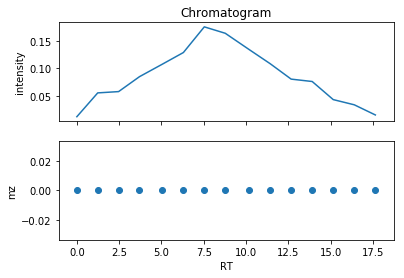

KnownChemical - 'C4H8S5' rt=841.82 max_intensity=475956.22
[140054.8 336950.2 463597.6 323454.1 416029.5 342362.1 187072.7 287019.5
 319071.2 344461.8 254629.7 422561.6 414777.7 475950.6 369459.9]


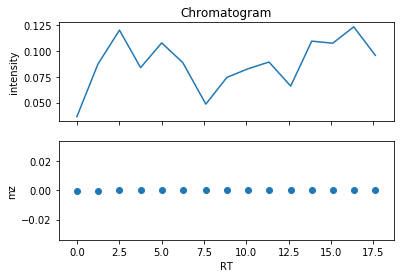

KnownChemical - 'C7H3Cl5O' rt=496.81 max_intensity=3158474.06
[ 528203.3 1012225.  1804798.  1728145.  2613399.  3129617.  3158520.
 2619894.  2279806.  1668391.  1200119.   559663.6  413617.8]


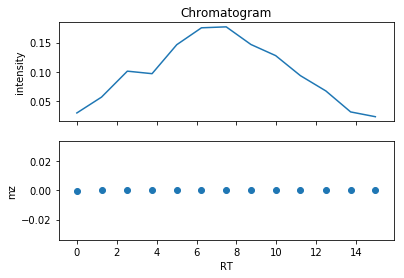

KnownChemical - 'C10H9NO6' rt=826.64 max_intensity=309868.75
[ 61604.24 131297.5  191877.5  296872.7  309870.4  262484.7  156946.2
  94697.32 133010.5   97458.48]


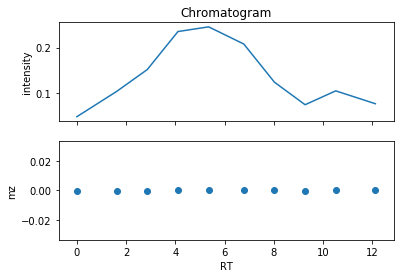

KnownChemical - 'C19H32O' rt=297.11 max_intensity=7548336.43
[3932225. 4800300. 5409787. 6144628. 6936376. 7549718. 7002647. 7242696.
 7433431. 5878390. 5091405. 5823347. 3929507. 3643089. 3132096. 2090456.
 1791980.]


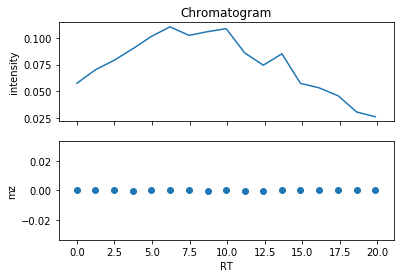

KnownChemical - 'C18H13O8' rt=238.65 max_intensity=5407757.58
[2173686.  2214173.  2473091.  2371911.  2314736.  2649678.  2484350.
 2051876.  2415046.  1990673.  2049085.  2592718.  2194876.  2438286.
 2994747.  2780322.  2813453.  2542876.  2381259.  3004518.  2762029.
 2602617.  2950375.  2766805.  3568614.  3101769.  2963771.  3384271.
 3482042.  4089582.  3986636.  4412106.  4726323.  5407215.  5298927.
 4849508.  4476013.  4910521.  5027143.  4562962.  4370529.  4687437.
 3718285.  3235339.  3713262.  2626635.  2528177.  2176026.  2122150.
 1558874.  1741269.  1500056.  1190523.  1262004.   905954.1 1477760.
  988074.8]


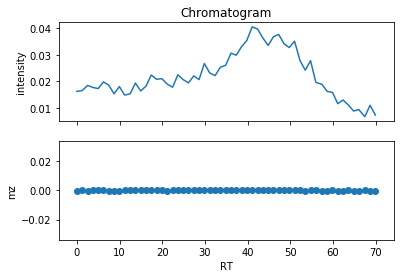

KnownChemical - 'C9H21N2O3' rt=970.16 max_intensity=1969961.64
[ 271128.1  738136.9  807319.6 1056138.  1220700.  1547596.  1470646.
 1873753.  1822158.  1850132.  1741852.  1969972.  1045484.  1103241.
  762274.2  597292.4  309361.8  294391.9]


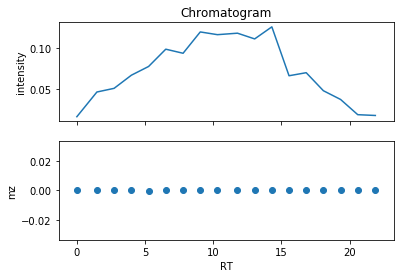

KnownChemical - 'C7H6O6' rt=334.46 max_intensity=1680588.97
[ 989064.5 1009647.  1164651.  1587274.  1578428.  1397820.  1680645.
 1391150.   904927.4  997887.6  656404.3  591051.9]


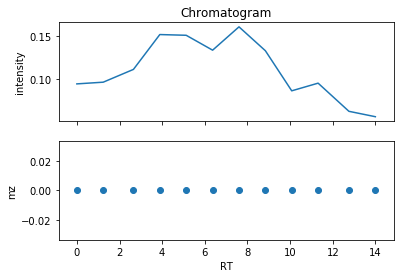

KnownChemical - 'C7H13Cl2N2O3P' rt=682.95 max_intensity=6283892.70
[5603495. 5722181. 5699402. 5967396. 6285355. 5959152. 5656906. 5041601.
 5328313. 4980594.]


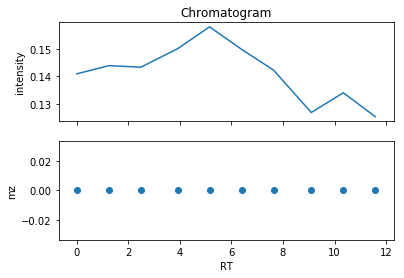

KnownChemical - 'C3H3Br2IO' rt=687.04 max_intensity=2860563.04
[ 353069.8  810361.9 1034106.  1698351.  2365928.  2707648.  2860469.
 2610205.  2713552.  2265564.  1894741.  1673696.  1659037.  1266158.
 1396963.  1479445.  1287224.  1125254.  1198506.  1206009.  1052759.
  820596.3  454896.1  262682.   256289.2  247172.6  104401.4]


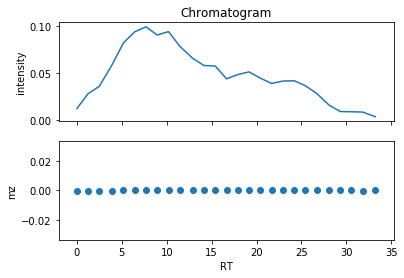

In [13]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a Top-N controller

We can run the dataset through a top-N DDA controller

In [ ]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms1_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\no_noise_top_N_controller.mzML'))

### Set up a DIA controller

We can run the dataset through a DIA controller

In [ ]:
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\no_noise_dia_controller.mzML'))